A1: Linear Regression using one feature (duration)


In [10]:
# A1: Linear Regression using single feature ('duration')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df1 = pd.read_csv('/content/processed_fluency_dataset.csv')  # Replace with your actual path
df1['tempo'] = df1['tempo'].apply(lambda x: float(x.strip('[]')))

# Features and target
X = df1[['duration']]
y = df1['fluency_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg1 = LinearRegression().fit(X_train, y_train)

# Predictions
y_train_pred = reg1.predict(X_train)
y_test_pred = reg1.predict(X_test)


A2: Evaluate the Linear Regression Model


In [18]:
# A2: Evaluate Linear Regression model using MSE, RMSE, MAPE, and R²

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Define a function for metric calculation
def regression_metrics1(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Train set metrics
train_mse1, train_rmse1, train_mape1, train_r21 = regression_metrics1(y_train, y_train_pred)
print("Train Metrics:")
print(f"MSE: {train_mse1:.4f}, RMSE: {train_rmse1:.4f}, MAPE: {train_mape1:.4f}, R²: {train_r21:.4f}")

# Test set metrics
test_mse1, test_rmse1, test_mape1, test_r21 = regression_metrics1(y_test, y_test_pred)
print("\nTest Metrics:")
print(f"MSE: {test_mse1:.4f}, RMSE: {test_rmse1:.4f}, MAPE: {test_mape1:.4f}, R²: {test_r21:.4f}")


Train Metrics:
MSE: 0.9223, RMSE: 0.9604, MAPE: 2063707261057683.2500, R²: 0.0001

Test Metrics:
MSE: 0.8871, RMSE: 0.9419, MAPE: 1902613828975292.7500, R²: -0.0011


A3: Linear Regression using All Features

In [20]:
# A3: Linear Regression using all features

# Select multiple features
X_all = df1[['duration', 'rms', 'zcr', 'tempo']]
y = df1['fluency_encoded']

# Split data
X_train_all1, X_test_all1, y_train_all1, y_test_all1 = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Train model
reg_all = LinearRegression().fit(X_train_all1, y_train_all1)

# Predict
y_train_pred_all = reg_all.predict(X_train_all1)
y_test_pred_all = reg_all.predict(X_test_all1)

# Evaluate
train_metrics_all = regression_metrics1(y_train_all1, y_train_pred_all)
test_metrics_all = regression_metrics1(y_test_all1, y_test_pred_all)

# Display results
print("Train Metrics (All Features):")
print(f"MSE: {train_metrics_all[0]:.4f}, RMSE: {train_metrics_all[1]:.4f}, MAPE: {train_metrics_all[2]:.4f}, R²: {train_metrics_all[3]:.4f}")

print("\nTest Metrics (All Features):")
print(f"MSE: {test_metrics_all[0]:.4f}, RMSE: {test_metrics_all[1]:.4f}, MAPE: {test_metrics_all[2]:.4f}, R²: {test_metrics_all[3]:.4f}")


Train Metrics (All Features):
MSE: 0.7754, RMSE: 0.8805, MAPE: 1773170936687952.5000, R²: 0.1594

Test Metrics (All Features):
MSE: 0.7437, RMSE: 0.8624, MAPE: 1623839284551082.7500, R²: 0.1607


A4: Perform K-Means Clustering with k = 2

In [21]:
# A4: Perform KMeans clustering with k=2 (unsupervised learning)

from sklearn.cluster import KMeans

# Use the same features as before
X_cluster1 = df1[['duration', 'rms', 'zcr', 'tempo']]

# Apply KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_2.fit(X_cluster1)

# Get cluster labels and centers
cluster_labels1 = kmeans_2.labels_
cluster_centers1 = kmeans_2.cluster_centers_

print("Cluster Labels (first 10):", cluster_labels1[:10])
print("\nCluster Centers:\n", cluster_centers1)


Cluster Labels (first 10): [1 1 1 0 0 0 0 0 0 0]

Cluster Centers:
 [[1.14050777e+01 2.02108305e-02 4.89032594e-02 1.07574419e+02]
 [1.01196784e+01 1.93822984e-02 4.78399690e-02 1.70503312e+02]]


A5: Evaluate K-Means Clustering (k=2)

In [22]:
# A5: Clustering Evaluation Metrics

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score: how similar a point is to its own cluster vs others (higher is better)
silhouette1 = silhouette_score(X_cluster1, cluster_labels1)

# Calinski-Harabasz Index: ratio of between-cluster dispersion and within-cluster dispersion (higher is better)
ch_score1 = calinski_harabasz_score(X_cluster1, cluster_labels1)

# Davies-Bouldin Index: average similarity between each cluster and its most similar one (lower is better)
db_score1 = davies_bouldin_score(X_cluster1, cluster_labels1)

print(f"Silhouette Score: {silhouette1:.4f}")
print(f"Calinski-Harabasz Score: {ch_score1:.4f}")
print(f"Davies-Bouldin Index: {db_score1:.4f}")


Silhouette Score: 0.5205
Calinski-Harabasz Score: 3282.0461
Davies-Bouldin Index: 0.7037


A6: K-Means Clustering for Different Values of k (2 to 10)

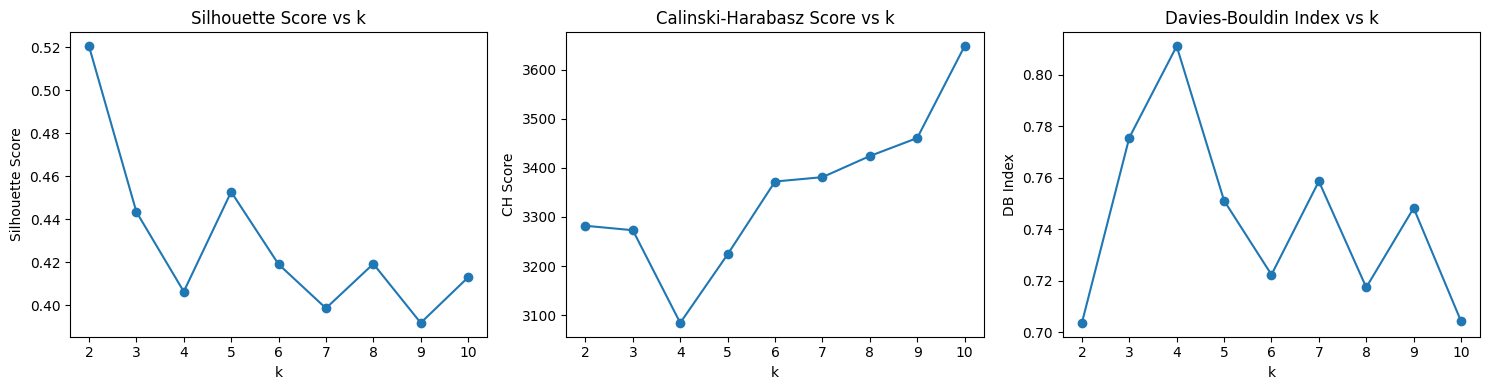

In [23]:
# A6: Evaluate clustering for different k values

silhouette_scores = []
ch_scores = []
db_scores = []
k_values = list(range(2, 11))

for k in k_values:
    kmeans1 = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels1 = kmeans1.fit_predict(X_cluster1)

    silhouette_scores.append(silhouette_score(X_cluster1, labels1))
    ch_scores.append(calinski_harabasz_score(X_cluster1, labels1))
    db_scores.append(davies_bouldin_score(X_cluster1, labels1))

# Plot all three metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('k'), plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('k'), plt.ylabel('CH Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('k'), plt.ylabel('DB Index')

plt.tight_layout()
plt.show()


A7: Elbow Method to Determine Optimal k

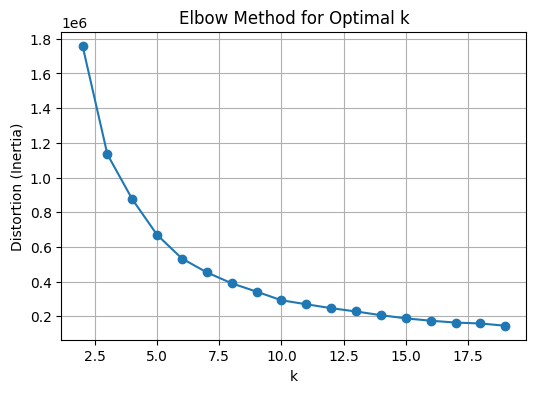

In [24]:
# A7: Elbow Method to find optimal k

distortions = []
k_range = range(2, 20)

for k in k_range:
    kmeans1 = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans1.fit(X_cluster1)
    distortions.append(kmeans1.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('k')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()